# 숫자 분류 모델 제작
- MNIST 데이터셋으로부터 학습함
- 참고자료: https://keras.io/examples/vision/mnist_convnet

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

## 데이터 가져오기
- keras에서 제공하는 MNIST 데이터셋 사용

In [2]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

## 데이터 살펴보기

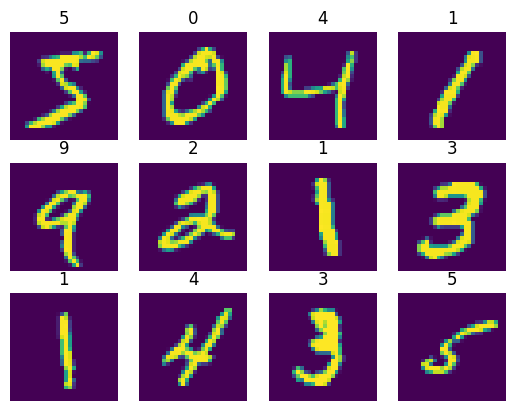

In [3]:
from numpy.random import choice

NUM_SAMPLES = 12
samples = choice(len(x_train), NUM_SAMPLES)
for i in range(NUM_SAMPLES):
    plt.subplot(3, 4, i + 1)
    plt.axis(False)
    plt.imshow(x_train[i])
    plt.title(y_train[i])
plt.show()

## 데이터 전처리
- [0, 255] 범위의 정수를 [0, 1] 범위의 실수로 변환
- Keras API에 사용하기 위해 행렬을 28x28에서 28x28x1로 변환
- y값에 one hot encoding을 적용함

In [4]:
x_train = x_train.reshape(-1, 28, 28, 1) / 255
x_test = x_test.reshape(-1, 28, 28, 1) / 255
x_train.shape, x_train.dtype

((60000, 28, 28, 1), dtype('float64'))

In [5]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train.shape, y_train.dtype

((60000, 10), dtype('float32'))

## 데이터 증강

In [6]:
from keras.preprocessing.image import ImageDataGenerator

generator = ImageDataGenerator(
    rotation_range=18,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    fill_mode='constant',
    cval=0,
)

## 모델 구성

In [7]:
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

kernel_size = (3, 3)

model = Sequential([
    Conv2D(32, kernel_size, activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size, activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

2023-08-04 18:32:15.354026: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2023-08-04 18:32:15.354091: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2023-08-04 18:32:15.354109: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2023-08-04 18:32:15.354157: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-08-04 18:32:15.354177: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


## 모델 학습
- 검증 데이터 기준 98% 정확도

In [8]:
history = model.fit(
    generator.flow(x_train, y_train, batch_size=512),
    epochs=15,
    validation_data=(x_test, y_test),
    verbose=1
)

Epoch 1/15


2023-08-04 18:32:16.074312: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


118/118 [==============================] - ETA: 0s - loss: 1.1545 - accuracy: 0.6233

2023-08-04 18:32:25.985670: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


118/118 [==============================] - 13s 106ms/step - loss: 1.1545 - accuracy: 0.6233 - val_loss: 0.1652 - val_accuracy: 0.9614
Epoch 2/15
118/118 [==============================] - 12s 100ms/step - loss: 0.4722 - accuracy: 0.8543 - val_loss: 0.0972 - val_accuracy: 0.9727
Epoch 3/15
118/118 [==============================] - 12s 99ms/step - loss: 0.3528 - accuracy: 0.8927 - val_loss: 0.0731 - val_accuracy: 0.9790
Epoch 4/15
118/118 [==============================] - 12s 100ms/step - loss: 0.3058 - accuracy: 0.9064 - val_loss: 0.0613 - val_accuracy: 0.9845
Epoch 5/15
118/118 [==============================] - 12s 99ms/step - loss: 0.2650 - accuracy: 0.9190 - val_loss: 0.0533 - val_accuracy: 0.9848
Epoch 6/15
118/118 [==============================] - 12s 99ms/step - loss: 0.2409 - accuracy: 0.9272 - val_loss: 0.0483 - val_accuracy: 0.9865
Epoch 7/15
118/118 [==============================] - 12s 100ms/step - loss: 0.2187 - accuracy: 0.9334 - val_loss: 0.0456 - val_accuracy: 0.9860

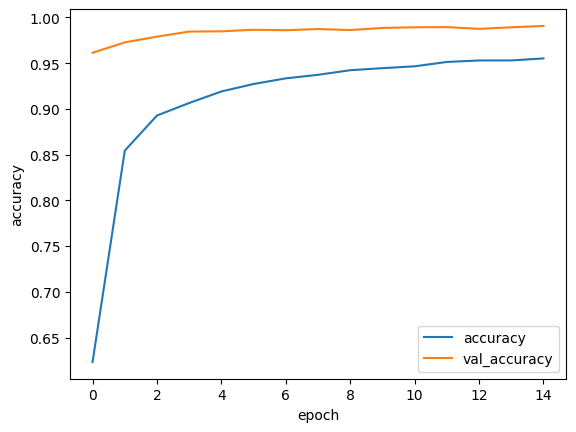

In [9]:
# draw accuracy and val_accuracy graph
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

# 모델 저장

In [12]:
from datetime import datetime

model_name = f"model-{datetime.utcnow().isoformat()}.keras"
model.save("../" + model_name)